In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv")

In [4]:
plt.rcParams["figure.figsize"] = (15,6)

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53943.0,26972.000000,15572.147122,1.0,13486.50,26972.00,40457.50,53943.00
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [8]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

<AxesSubplot:>

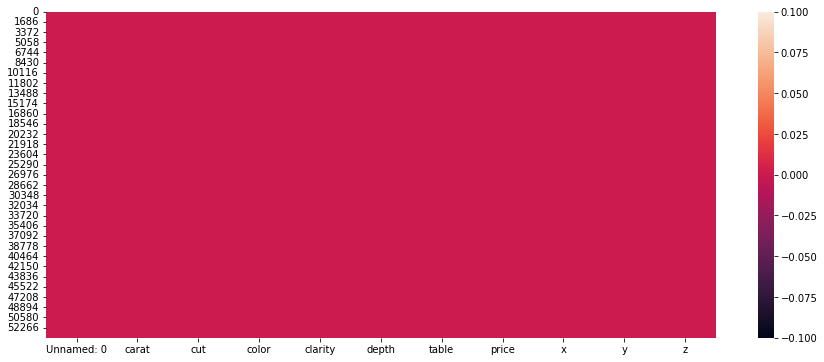

In [9]:
sns.heatmap(df.isnull())

<AxesSubplot:>

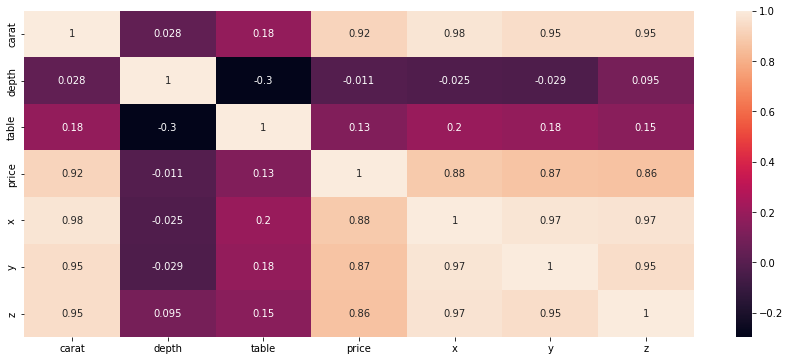

In [10]:
sns.heatmap(df.drop("Unnamed: 0", axis = 1).corr(),annot= True)

In [11]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<AxesSubplot:xlabel='color', ylabel='count'>

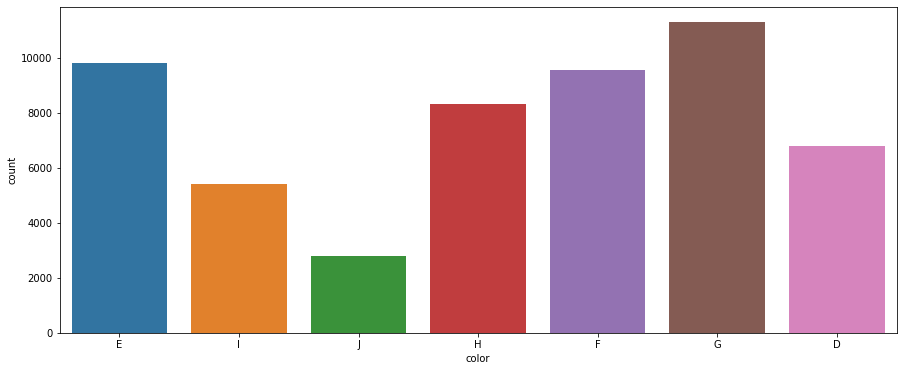

In [12]:
sns.countplot(data = df, x = 'color')

In [13]:
df['price'].mean()

3932.734293606214

In [14]:
#G is the most common 
df[df['color']=='G']['price'].mean()

3999.135671271697

In [15]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df['carat'].sort_values(ascending=False)[0:5]

27415    5.01
27630    4.50
27130    4.13
25998    4.01
25999    4.01
Name: carat, dtype: float64

<AxesSubplot:xlabel='carat', ylabel='price'>

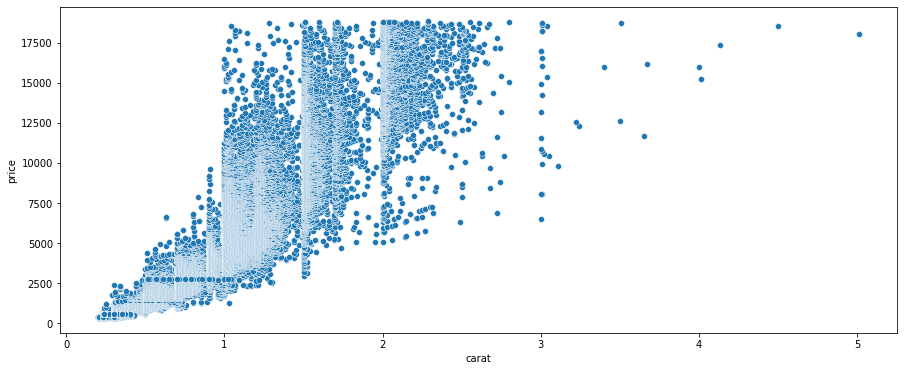

In [17]:
sns.scatterplot(data = df, x = 'carat', y = 'price')

<AxesSubplot:xlabel='carat', ylabel='price'>

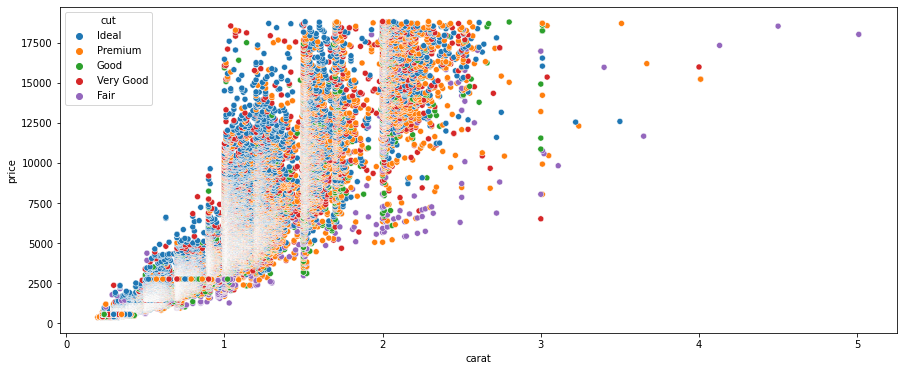

In [18]:
sns.scatterplot(data = df, x = 'carat', y = 'price',hue = 'cut')

<AxesSubplot:xlabel='depth', ylabel='price'>

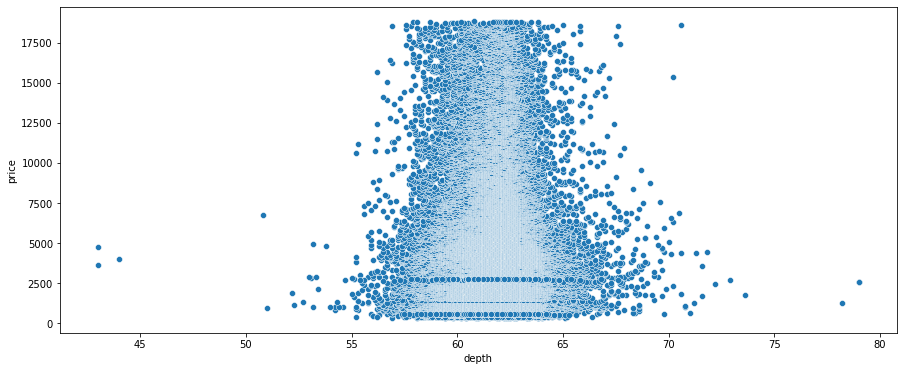

In [19]:
sns.scatterplot(data = df, x = 'depth', y = 'price')

In [20]:
df['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [21]:
print(f"This is the max price {df['price'].max()}")
print(f"This is the mix price {df['price'].min()}")
print(f"Difference between Max price and min price is {df['price'].max() - df['price'].min()}")

This is the max price 18823
This is the mix price 326
Difference between Max price and min price is 18497


<AxesSubplot:xlabel='clarity', ylabel='count'>

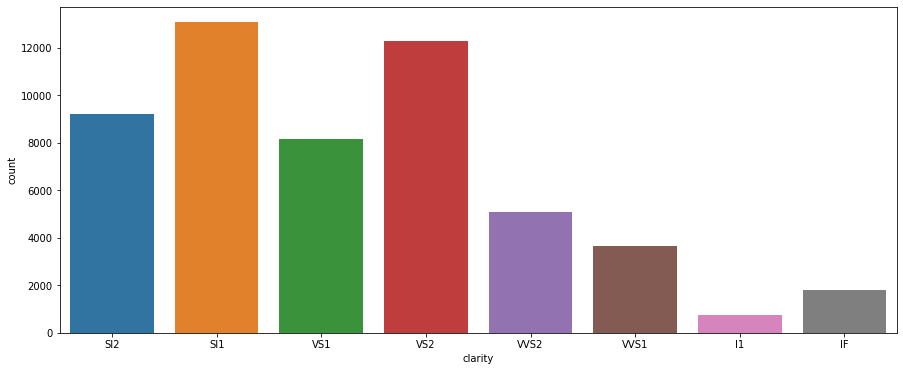

In [22]:
sns.countplot(data = df, x = 'clarity')

In [23]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='cut', ylabel='count'>

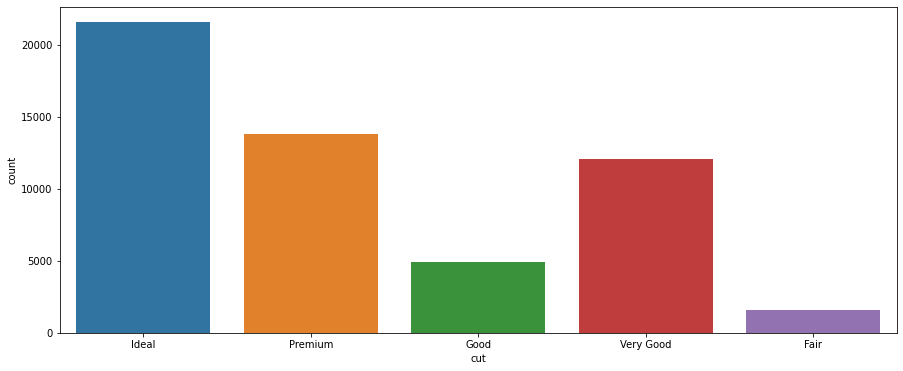

In [24]:
sns.countplot(data = df, x = 'cut')

<AxesSubplot:xlabel='price', ylabel='cut'>

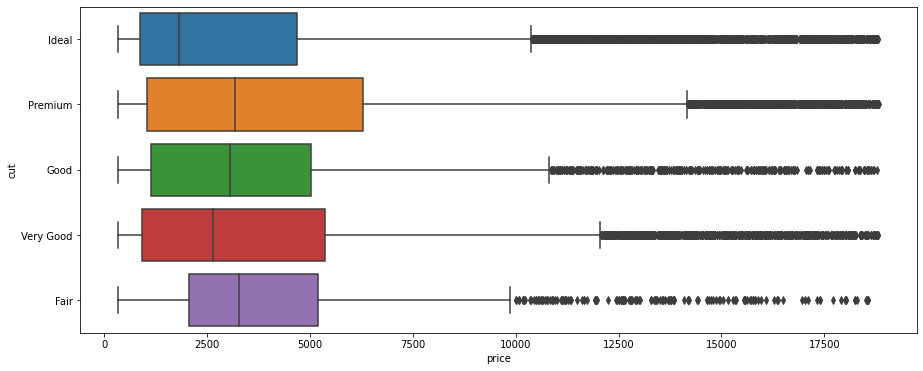

In [25]:
sns.boxplot(data = df, x = 'price',y = 'cut')

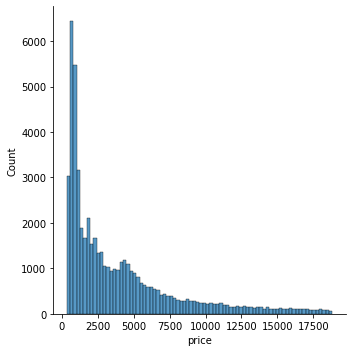

In [26]:
sns.displot(data = df, x = 'price')

In [27]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [29]:
df.groupby(by = 'cut').mean()['price'].sort_values()

cut
Ideal        3457.541970
Good         3928.864452
Very Good    3981.658529
Fair         4358.757764
Premium      4583.992605
Name: price, dtype: float64

In [30]:
df.groupby(by = 'color').mean()['price'].sort_values()

color
E    3076.687111
D    3169.954096
F    3724.784868
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [31]:
#prepareing for machine learning

In [32]:
df.drop(labels = ['Unnamed: 0'],axis = "columns", inplace = True)

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df = pd.get_dummies(data = df, drop_first=True)

In [35]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [36]:
y = df['price']
X = df.drop('price',axis = 1)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
def modelPrediction(model):
    model.fit(X_train_scaled,y_train)
    prediction = model.predict(X_test_scaled)
    print(f"MSE is {round(mean_squared_error(y_test,prediction),2)}")
    print(f"RMSE is {round(np.sqrt(mean_squared_error(y_test,prediction)),2)}")
    print(f"R^2 score is {round(r2_score(y_test,prediction),2)}")
    sns.scatterplot(x = prediction, y = y_test)

MSE is 1225040.54
RMSE is 1106.82
R^2 score is 0.92


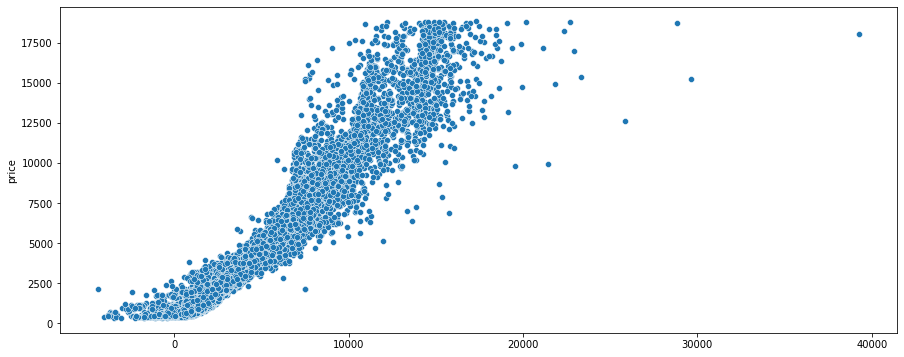

In [43]:
linModel = LinearRegression()
modelPrediction(linModel)

MSE is 750942.26
RMSE is 866.57
R^2 score is 0.95


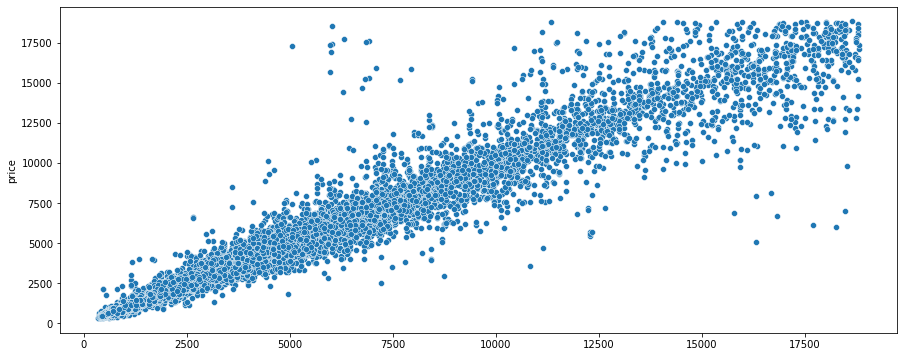

In [44]:
dtr = DecisionTreeRegressor()
modelPrediction(dtr)

MSE is 392168.36
RMSE is 626.23
R^2 score is 0.97


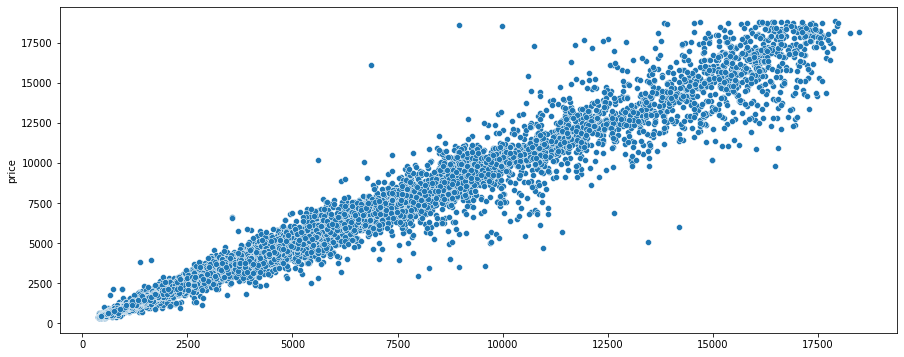

In [45]:
rfr = RandomForestRegressor()
modelPrediction(rfr)

Random forest performed best